In [156]:
print("Activating ipynb")
print ("Importing libs")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

Activating ipynb
Importing libs


In [157]:
# Global
years = [x for x in range (2012, 2022)]

In [158]:
# Load Stats
stats_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/"
stats_2012 = pd.read_csv(stats_folder_path + '2012.csv', index_col=False)
stats_2013 = pd.read_csv(stats_folder_path + '2013.csv', index_col=False)
stats_2014 = pd.read_csv(stats_folder_path + '2014.csv', index_col=False)
stats_2015 = pd.read_csv(stats_folder_path + '2015.csv', index_col=False)
stats_2016 = pd.read_csv(stats_folder_path + '2016.csv', index_col=False)
stats_2017 = pd.read_csv(stats_folder_path + '2017.csv', index_col=False)
stats_2018 = pd.read_csv(stats_folder_path + '2018.csv', index_col=False)
stats_2019 = pd.read_csv(stats_folder_path + '2019.csv', index_col=False)
stats_2020 = pd.read_csv(stats_folder_path + '2020.csv', index_col=False)
stats_2021 = pd.read_csv(stats_folder_path + '2021.csv', index_col=False)

all_stats = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Players/stats_sorted.csv"
all_stats_raw = pd.read_csv(all_stats, index_col=False)

C:\Users\Craig\AppData\Local\Temp\ipykernel_6424\431392878.py:15: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  all_stats_raw = pd.read_csv(all_stats, index_col=False)


In [159]:
# Load Initial Data
print("Loading Initial Game Data")
games_folder_path = "C:/Users/Craig/Documents/Thesis/Thomas_Gallagher_Thesis/Data/AFL_Stats_sorted/Year/Games/"
games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
games_2014 = pd.read_csv(games_folder_path + '2014.csv', index_col=False, parse_dates=['date'])
games_2015 = pd.read_csv(games_folder_path + '2015.csv', index_col=False, parse_dates=['date'])
games_2016 = pd.read_csv(games_folder_path + '2016.csv', index_col=False, parse_dates=['date'])
games_2017 = pd.read_csv(games_folder_path + '2017.csv', index_col=False, parse_dates=['date'])
games_2018 = pd.read_csv(games_folder_path + '2018.csv', index_col=False, parse_dates=['date'])
games_2019 = pd.read_csv(games_folder_path + '2019.csv', index_col=False, parse_dates=['date'])
games_2020 = pd.read_csv(games_folder_path + '2020.csv', index_col=False, parse_dates=['date'])
games_2021 = pd.read_csv(games_folder_path + '2021.csv', index_col=False, parse_dates=['date'])

all_games_path = os.path.join(games_folder_path + "games_sorted.csv")
all_g = pd.concat([games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021])
all_g.to_csv(all_games_path, index=False)
all_games = pd.read_csv(all_games_path, index_col=False, parse_dates=['date'])

Loading Initial Game Data


C:\Users\Craig\AppData\Local\Temp\ipykernel_6424\638154051.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2012 = pd.read_csv(games_folder_path + '2012.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_6424\638154051.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2013 = pd.read_csv(games_folder_path + '2013.csv', index_col=False, parse_dates=['date'])
C:\Users\Craig\AppData\Local\Temp\ipykernel_6424\638154051.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  games_2014 = pd.read_csv(games_folder

In [160]:
games_list_year = [games_2012, games_2013, games_2014, games_2015, games_2016, games_2017, games_2018, games_2019, games_2020, games_2021]
# stats_list_year = [stats_2012, stats_2013, stats_2014, stats_2015, stats_2016, stats_2017, stats_2018, stats_2019, stats_2020, stats_2021]

## Build Y value 
Result of game based on Home Team (Win = 2, Draw = 1, Lose = 0)

In [161]:
y_true_2012 = games_2012['homeWin']
y_true_2013 = games_2013['homeWin']
y_true_2014 = games_2014['homeWin']
y_true_2015 = games_2015['homeWin']
y_true_2016 = games_2016['homeWin']
y_true_2017 = games_2017['homeWin']
y_true_2018 = games_2018['homeWin']
y_true_2019 = games_2019['homeWin']
y_true_2020 = games_2020['homeWin']
y_true_2021 = games_2021['homeWin']
y_true_all = all_games['homeWin']

In [162]:
baseline = {}
bline = pd.DataFrame
def get_baseline(y, year):
    # print(y.count())
    
    baseline[year] = (y.sum() / (y.count())) * 100

get_baseline(y_true_2012, '2012')
get_baseline(y_true_2013, '2013')
get_baseline(y_true_2014, '2014')
get_baseline(y_true_2015, '2015')
get_baseline(y_true_2016, '2016')
get_baseline(y_true_2017, '2017')
get_baseline(y_true_2018, '2018')
get_baseline(y_true_2019, '2019')
get_baseline(y_true_2020, '2020')
get_baseline(y_true_2021, '2021')

print(baseline)

{'2012': 55.55555555555556, '2013': 55.55555555555556, '2014': 56.52173913043478, '2015': 52.42718446601942, '2016': 59.42028985507246, '2017': 58.454106280193244, '2018': 54.589371980676326, '2019': 57.00483091787439, '2020': 56.17283950617284, '2021': 51.690821256038646}


## Label Encoding
The tree models used for feature engineering cannot take in string inputs
Value encoding is used to change the string inputs to integer inputs
This does create a minor distance issue, a model can infer that there is a distance between the encoded values (i.e. label encoded as 1 is less important than value encoded as 18). One Hot Encoding can be used to fix this probelem by creating a binary value for each label. However this can create a sparse data set which is not interpreted well by Tree Models. So only Label Encoding will be used in the feature engineering


In [163]:
# Label Encoding Teams
encoding = LabelEncoder()
encoding.fit(all_games["homeTeam"].values)

def OHE_Teams(games):
    home_teams = encoding.transform(games["homeTeam"].values)
    away_teams = encoding.transform(games["awayTeam"].values)
    
    #
    games["homeTeam"] = home_teams
    games["awayTeam"] = away_teams
    ##
    # all_teams = np.vstack([home_teams, away_teams]).T
    
    # oneHot = OneHotEncoder()
    # X_teams = oneHot.fit_transform(all_teams).todense()
    # X_teams = pd.DataFrame(all_teams)
    # games = pd.concat([games, pd.DataFrame(X_teams)],axis=1)
    return games

games_2012 = OHE_Teams(games_2012)
games_2013 = OHE_Teams(games_2013)
games_2014 = OHE_Teams(games_2014)
games_2015 = OHE_Teams(games_2015)
games_2016 = OHE_Teams(games_2016)
games_2017 = OHE_Teams(games_2017)
games_2018 = OHE_Teams(games_2018)
games_2019 = OHE_Teams(games_2019)
games_2020 = OHE_Teams(games_2020)
games_2021 = OHE_Teams(games_2021)

## One Hot Encoding Venues
Same issues as above, but simplified slightly as there are only 23 stadiums

In [164]:
# One Hot Encoding Venues
encoding = LabelEncoder()
encoding.fit(all_games["venue"].values)
all_venues = all_games["venue"].values

all_venues = all_venues.reshape(-1,1)

def OHE_Venues(games):
    

    venues = encoding.transform(games["venue"].values)
    
    
    #
    games["venue"] = venues
    
    # all_venues = all_venues.reshape(-1,1)
    
    # venues = games['venue'].values

    # venues = venues.reshape(-1,1)

    # oneHot = OneHotEncoder()

    # oneHot.fit(all_venues)
    # X_venues = oneHot.transform(venues).toarray()
    # X_venues = pd.DataFrame(X_venues, columns=oneHot.categories_[0])
    # games = pd.concat([games, X_venues], axis=1)
    return games

games_2012 = OHE_Venues(games_2012)
games_2013 = OHE_Venues(games_2013)
games_2014 = OHE_Venues(games_2014)
games_2015 = OHE_Venues(games_2015)
games_2016 = OHE_Venues(games_2016)
games_2017 = OHE_Venues(games_2017)
games_2018 = OHE_Venues(games_2018)
games_2019 = OHE_Venues(games_2019)
games_2020 = OHE_Venues(games_2020)
games_2021 = OHE_Venues(games_2021)

In [165]:
def split_time(row):
    time = row['startTime']
    time = time.split(':')
    time = ''.join(time[:2])
    row['startTime'] = time
    return row

games_2012 = games_2012.apply(split_time, axis=1)
games_2013 = games_2013.apply(split_time, axis=1)
games_2014 = games_2014.apply(split_time, axis=1)
games_2015 = games_2015.apply(split_time, axis=1)
games_2016 = games_2016.apply(split_time, axis=1)
games_2017 = games_2017.apply(split_time, axis=1)
games_2018 = games_2018.apply(split_time, axis=1)
games_2019 = games_2019.apply(split_time, axis=1)
games_2020 = games_2020.apply(split_time, axis=1)
games_2021 = games_2021.apply(split_time, axis=1)

In [166]:
games_2012.shape

(207, 43)

In [167]:
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )

In [168]:
# Remove Variables
drop_values = ['gameId', 'homeWin', 'year','date', 'homeTeamScore', 'awayTeamScore', 'round']
X_2012 = games_2012.drop(drop_values,axis=1)
X_2013 = games_2013.drop(drop_values,axis=1)
X_2014 = games_2014.drop(drop_values,axis=1)
X_2015 = games_2015.drop(drop_values,axis=1)    
X_2016 = games_2016.drop(drop_values,axis=1)
X_2017 = games_2017.drop(drop_values,axis=1)
X_2018 = games_2018.drop(drop_values,axis=1)
X_2019 = games_2019.drop(drop_values,axis=1)
X_2020 = games_2020.drop(drop_values,axis=1)
X_2021 = games_2021.drop(drop_values,axis=1)

In [169]:
X_2012.columns = X_2012.columns.astype(str) 
X_2013.columns = X_2013.columns.astype(str) 
X_2014.columns = X_2014.columns.astype(str) 
X_2015.columns = X_2015.columns.astype(str) 
X_2016.columns = X_2016.columns.astype(str) 
X_2017.columns = X_2017.columns.astype(str) 
X_2018.columns = X_2018.columns.astype(str) 
X_2019.columns = X_2019.columns.astype(str) 
X_2020.columns = X_2020.columns.astype(str) 
X_2021.columns = X_2021.columns.astype(str) 

In [170]:
cols_2012 = X_2012.columns 
cols_2013 = X_2013.columns 
cols_2014 = X_2014.columns 
cols_2015 = X_2015.columns 
cols_2016 = X_2016.columns 
cols_2017 = X_2017.columns 
cols_2018 = X_2018.columns 
cols_2019 = X_2019.columns 
cols_2020 = X_2020.columns
cols_2021 = X_2021.columns

In [171]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X_2012 = scaler.fit_transform(X_2012)
X_2013 = scaler.fit_transform(X_2013)
X_2014 = scaler.fit_transform(X_2014)
X_2015 = scaler.fit_transform(X_2015)
X_2016 = scaler.fit_transform(X_2016)
X_2017 = scaler.fit_transform(X_2017)
X_2018 = scaler.fit_transform(X_2018)
X_2019 = scaler.fit_transform(X_2019)
X_2020 = scaler.fit_transform(X_2020)
X_2021 = scaler.fit_transform(X_2021)

# all_games = scaler.fit_transform(all_games)

In [172]:
X_2012 = pd.DataFrame(X_2012, columns=cols_2012)
X_2013 = pd.DataFrame(X_2013, columns=cols_2013)
X_2014 = pd.DataFrame(X_2014, columns=cols_2014)
X_2015 = pd.DataFrame(X_2015, columns=cols_2015)
X_2016 = pd.DataFrame(X_2016, columns=cols_2016)
X_2017 = pd.DataFrame(X_2017, columns=cols_2017)
X_2018 = pd.DataFrame(X_2018, columns=cols_2018)
X_2019 = pd.DataFrame(X_2019, columns=cols_2019)
X_2020 = pd.DataFrame(X_2020, columns=cols_2020)
X_2021 = pd.DataFrame(X_2021, columns=cols_2021)

## Decision Tree Classifier

For each season I will create a different classifier, so that each season can be assessed individually
These models will not include the 2021 season, even though the final model will be separate to the models created here the feature engineering means that information will possibly be extracted from the data. As such I will leave the final season out of feature engineering 

In [173]:
print(X_2012.isnull().sum().sum(),
X_2013.isnull().sum().sum(),
X_2014.isnull().sum().sum(),
X_2015.isnull().sum().sum(),
X_2016.isnull().sum().sum(),
X_2017.isnull().sum().sum(),
X_2018.isnull().sum().sum(),
X_2019.isnull().sum().sum(),
X_2020.isnull().sum().sum(),
X_2021.isnull().sum().sum() )

0 0 0 0 0 0 0 0 0 0


In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = {}
def build_dec_tree_scores(X, y, year):
    clf = DecisionTreeClassifier(random_state=26)
    scores_raw = clf.fit(X, y)
    scores_raw = cross_val_score(clf, X, y)
    scores[year] = np.mean(scores_raw)

build_dec_tree_scores(X_2012, y_true_2012, '2012')
build_dec_tree_scores(X_2013, y_true_2013, '2013')
build_dec_tree_scores(X_2014, y_true_2014, '2014')
build_dec_tree_scores(X_2015, y_true_2015, '2015')
build_dec_tree_scores(X_2016, y_true_2016, '2016')
build_dec_tree_scores(X_2017, y_true_2017, '2017')
build_dec_tree_scores(X_2018, y_true_2018, '2018')
build_dec_tree_scores(X_2019, y_true_2019, '2019')
build_dec_tree_scores(X_2020, y_true_2020, '2020')
build_dec_tree_scores(X_2021, y_true_2021, '2021')

print(scores)
# print("F1: {0:0.4f}".format(np.mean(scores)))

{'2012': 0.6044134727061558, '2013': 0.5559814169570267, '2014': 0.5119628339140534, '2015': 0.5682926829268293, '2016': 0.6333333333333333, '2017': 0.5559814169570267, '2018': 0.5803716608594657, '2019': 0.5651567944250872, '2020': 0.6238636363636363, '2021': 0.5416957026713123}


In [175]:
# Exploratory classifier on the original training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(X_2012, y_true_2012)
m.score(X_2012, y_true_2012)

# m.score(X_train_orig, y_train_orig)

0.9951690821256038

In [176]:
x_train_2012 = X_2012[:171]
y_train_2012 = y_true_2012[:171]
x_valid_2012 = X_2012[171:]
y_valid_2012 = y_true_2012[171:]

x_train_2013 = X_2013[:171]
y_train_2013 = y_true_2013[:171]
x_valid_2013 = X_2013[171:]
y_valid_2013 = y_true_2013[171:]

x_train_2014 = X_2014[:171]
y_train_2014 = y_true_2014[:171]
x_valid_2014 = X_2014[171:]
y_valid_2014 = y_true_2014[171:]

x_train_2015 = X_2015[:170]
y_train_2015 = y_true_2015[:170]
x_valid_2015 = X_2015[170:]
y_valid_2015 = y_true_2015[170:]

x_train_2016 = X_2016[:171]
y_train_2016 = y_true_2016[:171]
x_valid_2016 = X_2016[171:]
y_valid_2016 = y_true_2016[171:]

x_train_2017 = X_2017[:171]
y_train_2017 = y_true_2017[:171]
x_valid_2017 = X_2017[171:]
y_valid_2017 = y_true_2017[171:]

x_train_2018 = X_2018[:171]
y_train_2018 = y_true_2018[:171]
x_valid_2018 = X_2018[171:]
y_valid_2018 = y_true_2018[171:]

x_train_2019 = X_2019[:171]
y_train_2019 = y_true_2019[:171]
x_valid_2019 = X_2019[171:]
y_valid_2019 = y_true_2019[171:]

x_train_2020 = X_2020[:127]
y_train_2020 = y_true_2020[:127]
x_valid_2020 = X_2020[127:]
y_valid_2020 = y_true_2020[127:]

x_train_2021 = X_2021[:171]
y_train_2021 = y_true_2021[:171]
x_valid_2021 = X_2021[171:]
y_valid_2021 = y_true_2021[171:]

In [177]:
def print_score(m, train, y_train, valid, y_valid, test=None):
    pred = m.predict(valid)
    acc = m.score(valid, y_valid)
    print(acc)
    c_train = confusion_matrix(y_valid, pred)
    disp = ConfusionMatrixDisplay(c_train)
    return disp, acc

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = []
def build_dec_tree_scores(X, y, x_valid, y_valid, year):
    clf = DecisionTreeClassifier(random_state=26)
    clf.fit(X, y)
    return print_score(clf, X, y, x_valid, y_valid)

n_2012 = build_dec_tree_scores(x_train_2012, y_train_2012, x_valid_2012, y_valid_2012, '2012')
n_2013 = build_dec_tree_scores(x_train_2013, y_train_2013, x_valid_2013, y_valid_2013, '2013')
n_2014 = build_dec_tree_scores(x_train_2014, y_train_2014, x_valid_2014, y_valid_2014, '2014')
n_2015 = build_dec_tree_scores(x_train_2015, y_train_2015, x_valid_2015, y_valid_2015, '2015')
n_2016 = build_dec_tree_scores(x_train_2016, y_train_2016, x_valid_2016, y_valid_2016, '2016')
n_2017 = build_dec_tree_scores(x_train_2017, y_train_2017, x_valid_2017, y_valid_2017, '2017')
n_2018 = build_dec_tree_scores(x_train_2018, y_train_2018, x_valid_2018, y_valid_2018, '2018')
n_2019 = build_dec_tree_scores(x_train_2019, y_train_2019, x_valid_2019, y_valid_2019, '2019')
n_2020 = build_dec_tree_scores(x_train_2020, y_train_2020, x_valid_2020, y_valid_2020, '2020')

print(scores)

0.5555555555555556
0.5555555555555556
0.4722222222222222
0.5555555555555556
0.5833333333333334
0.6388888888888888
0.6111111111111112
0.6944444444444444
0.5428571428571428
{}


KeyError: 0

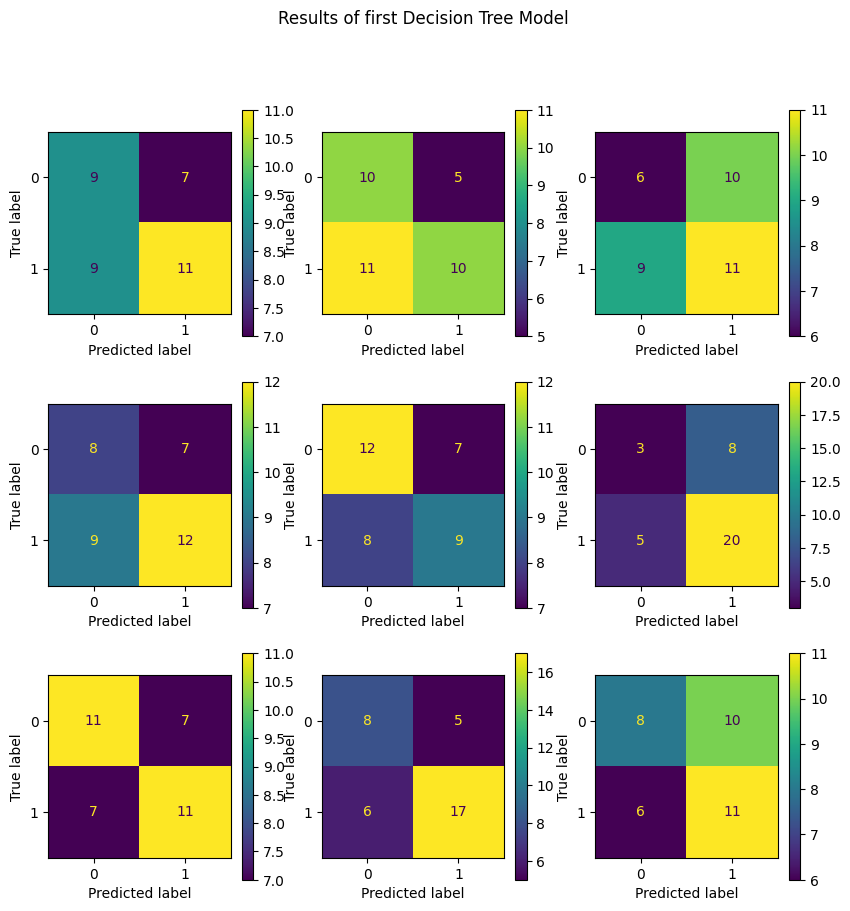

In [184]:
fig, ax = plt.subplots(3,3)
fig.set_figwidth(10)
fig.set_figheight(10)
fig.suptitle('Results of first Decision Tree Model')
n_2012.plot(ax=ax[0][0]), n_2013.plot(ax=ax[0][1]), n_2014.plot(ax=ax[0][2])
n_2015.plot(ax=ax[1][0]), n_2016.plot(ax=ax[1][1]), n_2017.plot(ax=ax[1][2])
n_2018.plot(ax=ax[2][0]), n_2019.plot(ax=ax[2][1]), n_2020.plot(ax=ax[2][2])

ax[0][0].title(f'2012 {scores[0]}')

In [183]:
model_1_2012 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2012.fit(x_train_2012, y_train_2012)
m_2012 = print_score(model_1_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)

model_1_2013 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2013.fit(x_train_2013, y_train_2013)
m_2013 = print_score(model_1_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)

model_1_2014 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2014.fit(x_train_2014, y_train_2014)
m_2014 = print_score(model_1_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)

model_1_2015 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2015.fit(x_train_2015, y_train_2015)
m_2015 = print_score(model_1_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)

model_1_2016 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2016.fit(x_train_2016, y_train_2016)
m_2016 = print_score(model_1_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)

model_1_2017 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2017.fit(x_train_2017, y_train_2017)
m_2017 = print_score(model_1_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)

model_1_2018 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2018.fit(x_train_2018, y_train_2018)
m_2018 = print_score(model_1_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)

model_1_2019 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2019.fit(x_train_2019, y_train_2019)
m_2019 = print_score(model_1_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)

model_1_2020 = RandomForestClassifier(n_estimators=200, n_jobs=-1)
model_1_2020.fit(x_train_2020, y_train_2020)
m_2020 = print_score(model_1_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)



0.6111111111111112
0.6388888888888888
0.75
0.6388888888888888
0.5
0.6944444444444444
0.6944444444444444
0.5833333333333334
0.6571428571428571


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x18bc0cebd90>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x18bc0ceb3a0>)

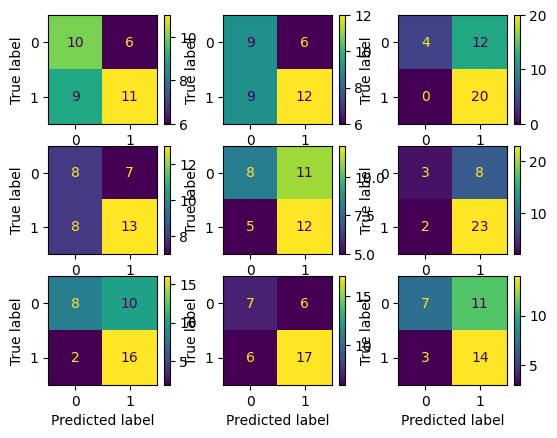

In [69]:
fig, ax = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('First Random Forest Classifier Results')
m_2012.plot(ax=ax[0][0]), m_2013.plot(ax=ax[0][1]), m_2014.plot(ax=ax[0][2])
m_2015.plot(ax=ax[1][0]), m_2016.plot(ax=ax[1][1]), m_2017.plot(ax=ax[1][2])
m_2018.plot(ax=ax[2][0]), m_2019.plot(ax=ax[2][1]), m_2020.plot(ax=ax[2][2])

In [70]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid={
    'criterion':        ['entropy','ginz   i'],
    'min_samples_split':[3, 5, 7, 9, 10],
    'min_samples_leaf': [8, 9, 10, 11, 12],
    'max_features':     [0.5, "sqrt", "log2", 0.8],
    'n_estimators':     [50, 100, 200],
}

model_2_2012 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2013 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2014 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2015 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2016 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2017 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2018 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2019 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)
model_2_2020 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid,cv=4,verbose=1,n_jobs=-1)


model_2_2012.fit(x_train_2012, y_train_2012)
m2_2012 = print_score(model_2_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)
model_2_2013.fit(x_train_2013, y_train_2013)
m2_2013 = print_score(model_2_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)
model_2_2014.fit(x_train_2014, y_train_2014)
m2_2014 = print_score(model_2_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)
model_2_2015.fit(x_train_2015, y_train_2015)
m2_2015 = print_score(model_2_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)
model_2_2016.fit(x_train_2016, y_train_2016)
m2_2016 = print_score(model_2_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)
model_2_2017.fit(x_train_2017, y_train_2017)
m2_2017 = print_score(model_2_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)
model_2_2018.fit(x_train_2018, y_train_2018)
m2_2018 = print_score(model_2_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)
model_2_2019.fit(x_train_2019, y_train_2019)
m2_2019 = print_score(model_2_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)
model_2_2020.fit(x_train_2020, y_train_2020)
m2_2020 = print_score(model_2_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)


Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.5555555555555556
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.7222222222222222
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6388888888888888
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.5833333333333334
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6388888888888888
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6944444444444444
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.7222222222222222
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6944444444444444
Fitting 4 folds for each of 600 candidates, totalling 2400 fits
0.6857142857142857


In [93]:
m1 = model_2_2012.best_estimator_.get_params()
m2 = model_2_2013.best_estimator_.get_params()
m3 = model_2_2014.best_estimator_.get_params()
m4 = model_2_2015.best_estimator_.get_params()
m5 = model_2_2016.best_estimator_.get_params()
m6 = model_2_2017.best_estimator_.get_params()
m7 = model_2_2018.best_estimator_.get_params()
m8 = model_2_2019.best_estimator_.get_params()
m9 = model_2_2020.best_estimator_.get_params()

In [71]:

model_3_2012 = model_2_2012.best_estimator_
model_3_2012.fit(x_train_2012, y_train_2012)
m3_2012 = print_score(model_3_2012, x_train_2012, y_train_2012, x_valid_2012, y_valid_2012)


model_3_2013 = model_2_2013.best_estimator_
model_3_2013.fit(x_train_2013, y_train_2013)
m3_2013 = print_score(model_3_2013, x_train_2013, y_train_2013, x_valid_2013, y_valid_2013)

model_3_2014 = model_2_2014.best_estimator_
model_3_2014.fit(x_train_2014, y_train_2014)
m3_2014 = print_score(model_3_2014, x_train_2014, y_train_2014, x_valid_2014, y_valid_2014)

model_3_2015 = model_2_2015.best_estimator_
model_3_2015.fit(x_train_2015, y_train_2015)
m3_2015 = print_score(model_3_2015, x_train_2015, y_train_2015, x_valid_2015, y_valid_2015)

model_3_2016 = model_2_2016.best_estimator_
model_3_2016.fit(x_train_2016, y_train_2016)
m3_2016 = print_score(model_3_2016, x_train_2016, y_train_2016, x_valid_2016, y_valid_2016)

model_3_2017 = model_2_2017.best_estimator_
model_3_2017.fit(x_train_2017, y_train_2017)
m3_2017 = print_score(model_3_2017, x_train_2017, y_train_2017, x_valid_2017, y_valid_2017)

model_3_2018 = model_2_2018.best_estimator_
model_3_2018.fit(x_train_2018, y_train_2018)
m3_2018 = print_score(model_3_2018, x_train_2018, y_train_2018, x_valid_2018, y_valid_2018)

model_3_2019 = model_2_2019.best_estimator_
model_3_2019.fit(x_train_2019, y_train_2019)
m3_2019 = print_score(model_3_2019, x_train_2019, y_train_2019, x_valid_2019, y_valid_2019)

model_3_2020 = model_2_2020.best_estimator_
model_3_2020.fit(x_train_2020, y_train_2020)
m3_2020 = print_score(model_3_2020, x_train_2020, y_train_2020, x_valid_2020, y_valid_2020)

0.5833333333333334
0.6944444444444444
0.6666666666666666
0.6111111111111112
0.6111111111111112
0.6944444444444444
0.6944444444444444
0.7222222222222222
0.6571428571428571


In [94]:

import seaborn as sns
y_proba_2012 = model_3_2012.predict_proba(x_valid_2012)
y_proba_2013 = model_3_2013.predict_proba(x_valid_2013)
y_proba_2014 = model_3_2014.predict_proba(x_valid_2014)
y_proba_2015 = model_3_2015.predict_proba(x_valid_2015)
y_proba_2016 = model_3_2016.predict_proba(x_valid_2016)
y_proba_2017 = model_3_2017.predict_proba(x_valid_2017)
y_proba_2018 = model_3_2018.predict_proba(x_valid_2018)
y_proba_2019 = model_3_2019.predict_proba(x_valid_2019)
y_proba_2020 = model_3_2020.predict_proba(x_valid_2020)

In [95]:
from treeinterpreter import treeinterpreter as ti

In [96]:
# fastai
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [105]:
fi_2012 = rf_feat_importance(model_3_2012 , pd.DataFrame(x_valid_2012))
fi_2013 = rf_feat_importance(model_3_2013 , pd.DataFrame(x_valid_2013))
fi_2014 = rf_feat_importance(model_3_2014 , pd.DataFrame(x_valid_2014))
fi_2015 = rf_feat_importance(model_3_2015 , pd.DataFrame(x_valid_2015))
fi_2016 = rf_feat_importance(model_3_2016 , pd.DataFrame(x_valid_2016))
fi_2017 = rf_feat_importance(model_3_2017 , pd.DataFrame(x_valid_2017))
fi_2018 = rf_feat_importance(model_3_2018 , pd.DataFrame(x_valid_2018))
fi_2019 = rf_feat_importance(model_3_2019 , pd.DataFrame(x_valid_2019))
fi_2020 = rf_feat_importance(model_3_2020 , pd.DataFrame(x_valid_2020))
fi_list = [fi_2012, fi_2013, fi_2014, fi_2015, fi_2016, fi_2017, fi_2017, fi_2018, fi_2019, fi_2020]

In [147]:
fi = {}
for features in fi_list:
    x = 15
    for feat in features[:15].cols.values:
        if feat in fi.keys():
            fi[feat] += x
        else:
            fi[feat] = x
        x -= 1

sorted_fi = sorted(fi.items(), key=lambda x:x[1], reverse=True)
sorted_fi

[('homeTeamPercentage', 139),
 ('awayTeamPercentage', 116),
 ('homeLadderPosition', 85),
 ('homeTeamImportanceSeasonAverage', 72),
 ('awayCurrentLadderPosition', 72),
 ('homeCurrentLadderPosition', 71),
 ('awayTeamImportanceSeasonAverage', 69),
 ('awayLadderPosition', 66),
 ('homeTeamImportanceLastGame', 63),
 ('homeTeamPointsFor', 61),
 ('awayTeamImportanceLastFiveGames', 57),
 ('homeTeamImportanceLastFiveGames', 50),
 ('awayTeamPointsAgainst', 49),
 ('homeGameDifference', 44),
 ('awayTeamImportanceLastGame', 25),
 ('awayTeamPointsFor', 25),
 ('homeTeam', 24),
 ('homeTeamPointsAgainst', 15),
 ('attendance', 14),
 ('awayTeam', 14),
 ('awayGameDifference', 14),
 ('awayTeamImportanceDifference', 13),
 ('homeTeamImportanceDifference', 12),
 ('homeTeamChanges', 5),
 ('awayTeamChanges', 5),
 ('startTime', 4),
 ('venue', 4),
 ('rainfall', 4),
 ('homeTeamLastWin', 3),
 ('homePreviousRainfall', 3),
 ('awayTravel', 2)]

In [155]:
final_fi = []
for fi in sorted_fi:
    fi = fi[0]
    if len(final_fi) == 16:
        continue
    if fi in final_fi:
        continue
    if "home" in fi:
        final_fi.append(fi)
        final_fi.append("away" + fi[4:])
    if "away" in fi:
        final_fi.append(fi)
        final_fi.append("home" + fi[4:])
final_fi

with open('features.txt', 'w') as f:
    for feat in final_fi:
        f.write(feat + '\n')

<Axes: xlabel='cols'>

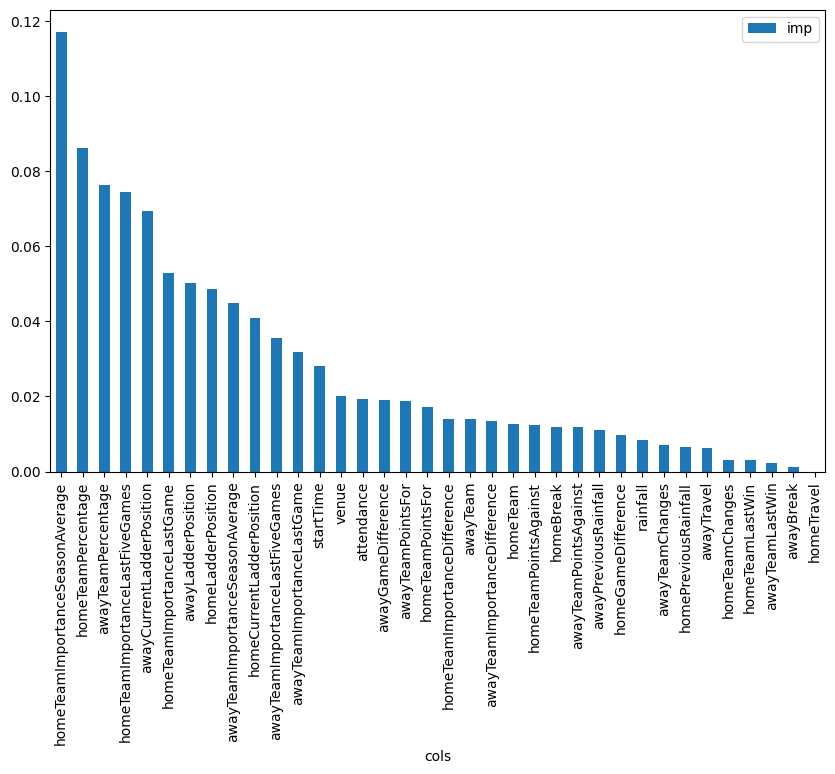

In [102]:
fi = rf_feat_importance(model_3_2012 , pd.DataFrame(x_valid_2012))
fi.plot('cols', 'imp', 'bar', figsize=(10,6))

In [150]:
# f = fi[:15].cols
cut_train_2012 = x_train_2012[final_fi]
cut_valid_2012 = x_valid_2012[final_fi]

cut_train_2013 = x_train_2013[final_fi]
cut_valid_2013 = x_valid_2013[final_fi]

cut_train_2014 = x_train_2014[final_fi]
cut_valid_2014 = x_valid_2014[final_fi]

cut_train_2015 = x_train_2015[final_fi]
cut_valid_2015 = x_valid_2015[final_fi]

cut_train_2016 = x_train_2016[final_fi]
cut_valid_2016 = x_valid_2016[final_fi]

cut_train_2017 = x_train_2017[final_fi]
cut_valid_2017 = x_valid_2017[final_fi]

cut_train_2018 = x_train_2018[final_fi]
cut_valid_2018 = x_valid_2018[final_fi]

cut_train_2019 = x_train_2019[final_fi]
cut_valid_2019 = x_valid_2019[final_fi]

cut_train_2020 = x_train_2020[final_fi]
cut_valid_2020 = x_valid_2020[final_fi]


In [151]:
model_4_2012 = model_2_2012.best_estimator_
model_4_2012.fit(cut_train_2012, y_train_2012)

model_4_2013 = model_2_2013.best_estimator_
model_4_2013.fit(cut_train_2013, y_train_2013)

model_4_2014 = model_2_2014.best_estimator_
model_4_2014.fit(cut_train_2014, y_train_2014)

model_4_2015 = model_2_2015.best_estimator_
model_4_2015.fit(cut_train_2015, y_train_2015)

model_4_2016 = model_2_2016.best_estimator_
model_4_2016.fit(cut_train_2016, y_train_2016)

model_4_2017 = model_2_2017.best_estimator_
model_4_2017.fit(cut_train_2017, y_train_2017)

model_4_2018 = model_2_2018.best_estimator_
model_4_2018.fit(cut_train_2018, y_train_2018)

model_4_2019 = model_2_2019.best_estimator_
model_4_2019.fit(cut_train_2019, y_train_2019)

model_4_2020 = model_2_2020.best_estimator_
model_4_2020.fit(cut_train_2020, y_train_2020)


print_score(model_4_2012, cut_train_2012, y_train_2012, cut_valid_2012, y_valid_2012)
print_score(model_4_2013, cut_train_2013, y_train_2013, cut_valid_2013, y_valid_2013)
print_score(model_4_2014, cut_train_2014, y_train_2014, cut_valid_2014, y_valid_2014)
print_score(model_4_2015, cut_train_2015, y_train_2015, cut_valid_2015, y_valid_2015)
print_score(model_4_2016, cut_train_2016, y_train_2016, cut_valid_2016, y_valid_2016)
print_score(model_4_2017, cut_train_2017, y_train_2017, cut_valid_2017, y_valid_2017)
print_score(model_4_2018, cut_train_2018, y_train_2018, cut_valid_2018, y_valid_2018)
print_score(model_4_2019, cut_train_2019, y_train_2019, cut_valid_2019, y_valid_2019)
print_score(model_4_2020, cut_train_2020, y_train_2020, cut_valid_2020, y_valid_2020)

0.6111111111111112
0.6666666666666666
0.6944444444444444
0.6111111111111112
0.6388888888888888
0.7777777777777778
0.7222222222222222
0.6666666666666666
0.6857142857142857
